## Trabalho Análise Estatística de Dados

### Questão A

##### Crie e execute um programa em python que, dadas as cotações do dólar no Brasil no mês de agosto referente aos últimos cinco anos, mostre um gráfico de média móvel de 7 dias referente a tais cotações para este mês. No gráfico, devem ser apresentadas legendas diferenciadas por ano.
#### Observações:
1) Como resultado da execução do código, deve aparecer via terminal, além do gráfico
supracitado acima, um histograma de frequência das cotações do dólar, onde é solicitado via
entrada do usuário o número de classes desejado para a construção do histograma;
2) Ainda deve ser mostrado para o usuário via gráfico o cruzamento das linhas gráficas de
diferentes legendas.


In [4]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [50]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [59]:
def get_dollar_quotes():
    base_url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.10813/dados?formato=json&dataInicial=01/08/2018&dataFinal=31/08/2022"
    data_by_year = {}

    for year in range(2018, 2023):
        response = requests.get(f"{base_url}{year}-08")
        if response.status_code == 200:
            data = response.json()
            df = pd.DataFrame(data)
            df['data'] = pd.to_datetime(df['data'], format="%d/%m/%Y")
            df.set_index('data', inplace=True)
            df['valor'] = pd.to_numeric(df['valor'])
            data_by_year[year] = df['valor']

    return data_by_year

In [60]:
quotes_by_year = get_dollar_quotes()

moving_averages_by_year = {}
for year, quotes in quotes_by_year.items():
    moving_averages = quotes.rolling(window=7).mean()
    moving_averages_by_year[year] = moving_averages

In [ ]:
df['valor'] = pd.to_numeric(df['valor'])

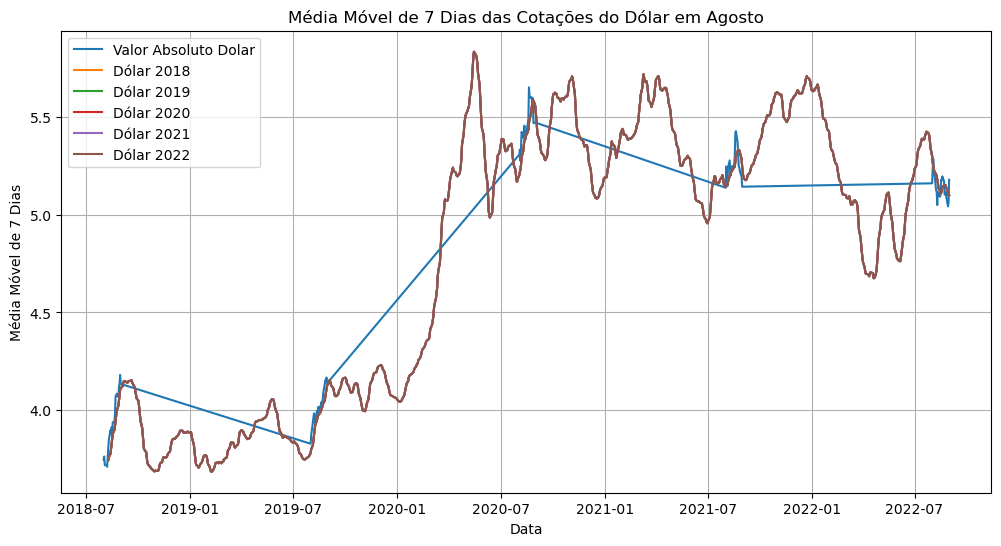

In [104]:
# Plota o gráfico com legendas diferenciadas por ano
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['valor'], label= 'Valor Absoluto Dolar')
for year, moving_averages in moving_averages_by_year.items():
    plt.plot(moving_averages.index[6:], moving_averages[6:], label=f"Dólar {year}")
    
    

plt.xlabel("Data")
plt.ylabel("Média Móvel de 7 Dias")
plt.title("Média Móvel de 7 Dias das Cotações do Dólar em Agosto")
plt.legend()
plt.grid(True)

# Exibe o gráfico
plt.show()